Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
            

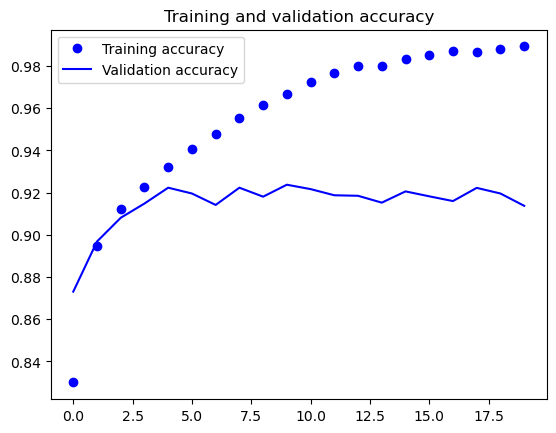

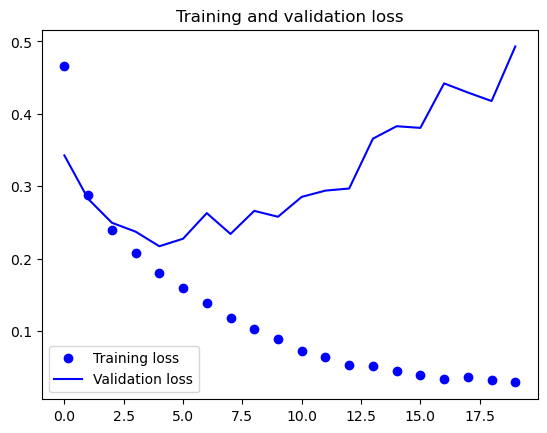

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist

#load fashion MNIST data 
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import scipy 


print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

#find the unique numbers from the training labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


#plt.figure(figsize=[5,5])

# Display the first image in training data
#plt.subplot(121)
#plt.imshow(train_X[0,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
#plt.subplot(122)
#plt.imshow(test_X[0,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(test_Y[0]))


#reshape data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


# Change the labels from categorical (labels for variables i.e. not numbers) to one-hot encoding (one boolean column for each category/class)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


#split the data into 80% for training and 20% for validation
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

#import modules needed to train the model
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

#setting batch size and the number of epochs that the network will run for
batch_size = 64
epochs = 20
num_classes = 10

#adding the layers of the network
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

#setting the optimisation to the Adam optimiser (much more advanced than simple stochsatic gradient descent)
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


#show the layers and their dimensions
fashion_model.summary()

#training the model using fit() function
fashion_train = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data=(valid_X, valid_label))

#Can now see each epoch, and the training success of the model against training and test data
#Had 99% accuracy on training data, but only 92% on test data with large loss, which suggest overfitting of the training data
#Need to add a dropout layer to help reduce the overfitting

#First we evaluate the training result on the test data set 
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

#plot the accuracy and loss data for the epochs as the training went on

print(fashion_train.history.keys()) #list of all the parameters stored in .history


accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)
Epoch 1/20
750/750 [==============================] - 41s 54ms/step - loss: 0.5912 - accuracy: 0.7803 - val_loss: 0.3651 - val_accuracy: 0.8685
Epoch 2/20
750/750 [==============================] - 36s 48ms/step - loss: 0.3776 - accuracy: 0.8617 - val_loss: 0.3265 - val_accuracy: 0.8765
Epoch 3/20
750/750 [==============================] - 35s 47ms/step - loss: 0.3306 - accuracy: 0.8769 - val_loss: 0.2778 - val_accuracy: 0.8972
Epoch 4/20
750/750 [==============================] - 37s 49ms/step - loss: 0.3015 - accuracy: 0.8892 - val_loss: 0.2654 - val_accuracy: 0.8989
Epoch 5/20
750/750 [==============================] - 38s 51ms/step - loss: 0.2833 - accuracy: 0.8951 - val_loss: 0.2444 - val_accuracy: 0.9092
Epoch 6/20
750/750 [==============================] -

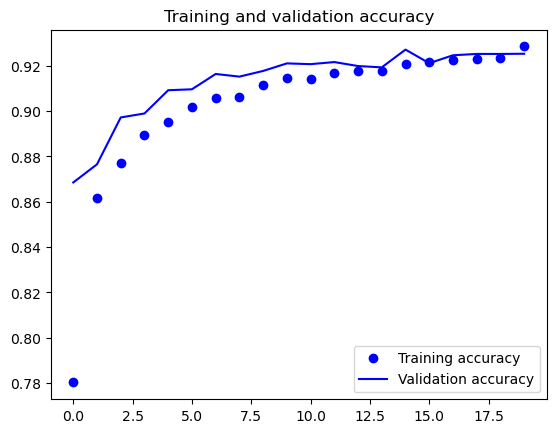

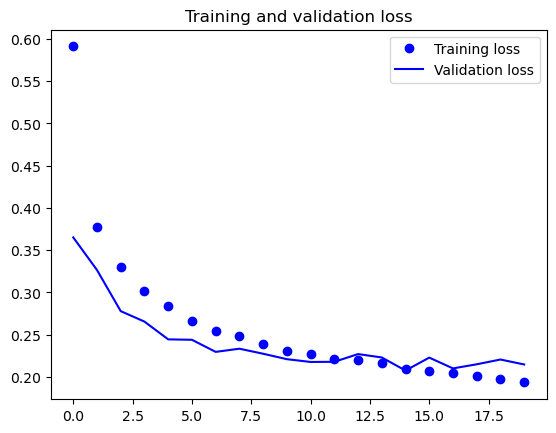

In [3]:
#NETWORK WITH DROPOUT LAYER ADDED IN

from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import fashion_mnist

#load fashion MNIST data 
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import scipy 


print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

#find the unique numbers from the training labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

#reshape data
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical (labels for variables i.e. not numbers) to one-hot encoding (one boolean column for each category/class)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#split the data into 80% for training and 20% for validation
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

#import modules needed to train the model
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

#setting batch size and the number of epochs that the network will run for
batch_size = 64
epochs = 20
num_classes = 10

#adding the layers of the neural network, including the dropout layers
#the dropout layers choose how many neurons to turn off using a hyperparameter, which can be tuned as desired
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

#show the layers and their dimensions
#fashion_model.summary()

#compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#train the model
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

#evaluate performance of the model
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

#plot the accuracy and loss graphs to show the improvement of the model performance compared to the previosu model
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



